## Iteration 2: R2, R3



In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_to_data = "/content/drive/My Drive/CP5046 ICT1 Project folder_Group2 Junyu Siddhanth/Siddhanth/Dev Package/Data/Test_Data_Result_(2).xlsx"

# reading dataset using pandas dataframe
df = pd.read_excel(path_to_data)
df.head()

,Label(0=Pre/1=Post),Age in Days,"Gender(0=M,1=F)","Sick Baby(0=N,1=Y)",S1,E1,S2,E2,S3,E3,S4,E4,S5,E5,bowelSounds/min,Avg duration
0,1,4,1,1,9.52,16.01,23.79,35.23,NaN,NaN,NaN,NaN,NaN,NaN,4.67,8.96
1,1,3,0,1,11.12,15.83,27.85,35.32,43.04,45.15,57.41,64.80,NaN,NaN,4.47,5.42
2,0,5,0,0,4.79,12.76,17.21,26.53,32.06,43.00,50.08,56.84,NaN,NaN,4.61,8.75
3,0,2,0,0,3.95,6.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.93,3.01
4,1,5,0,1,11.02,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.62,5.65


## I2 R2: Clinical measurement calculator

In [ ]:
# Calculating the mean, std, and other measurements from the dataset.
df.describe().round(2)

,Label(0=Pre/1=Post),Age in Days,"Gender(0=M,1=F)","Sick Baby(0=N,1=Y)",S1,E1,S2,E2,S3,E3,S4,E4,S5,E5,bowelSounds/min,Avg duration
count,100.00,100.00,100.0,100.00,100.00,100.00,80.00,80.00,60.00,60.00,40.00,40.00,20.00,20.00,100.00,100.00
mean,0.53,3.58,0.5,0.54,5.56,10.69,16.80,21.97,28.20,33.44,36.78,42.33,45.87,51.04,11.26,5.23
std,0.50,1.07,0.5,0.50,3.49,5.75,8.49,11.01,14.20,16.32,20.52,23.64,30.30,33.54,9.64,3.06
min,0.00,2.00,0.0,0.00,0.51,1.47,2.79,2.82,4.06,4.42,6.54,7.73,8.66,9.69,3.10,0.24
25%,0.00,3.00,0.0,0.00,2.72,5.86,9.78,12.62,16.91,20.15,21.46,22.94,22.79,26.52,4.71,3.03
50%,1.00,4.00,0.5,1.00,5.09,10.26,15.71,20.71,28.28,32.98,30.74,37.06,30.73,34.16,8.34,4.86
75%,1.00,4.00,1.0,1.00,7.70,15.29,24.96,31.82,42.30,48.24,55.54,62.89,80.30,87.03,13.22,7.08
max,1.00,5.00,1.0,1.00,14.26,23.55,32.01,43.80,52.71,58.73,72.89,82.46,90.47,102.02,54.88,16.93


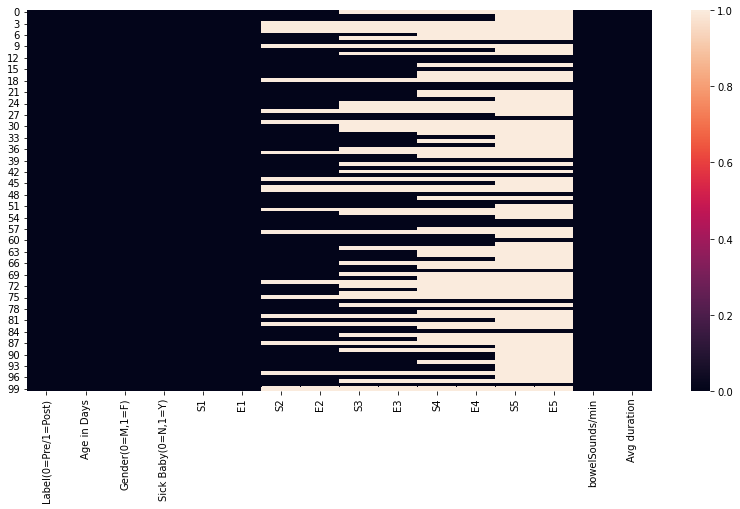

In [ ]:
# import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# heatmap plot to show null values in dataframe
plt.figure(figsize = (14,7))
sns.heatmap(df.isnull())
plt.show()

# the white colour shows the null values in the attributes

## I2 R3: Calculate Bowel sound rate and Average duration of a Bowel sound

In [ ]:
def get_no_bowelsounds(df):
  """Return pandas series for number of bowel sounds in each row"""
  se = pd.Series()
  for i in range(0, 100):
    if pd.isna(df.loc[i, 'S2']):
      se.loc[i] = 1
    elif pd.isna(df.loc[i, 'S3']):
      se.loc[i] = 2
    elif pd.isna(df.loc[i, 'S4']):
      se.loc[i] = 3
    elif pd.isna(df.loc[i, 'S5']):
      se.loc[i] = 4
    else:
      se.loc[i] = 5
  return se

def get_last_sound(df):
  """Return pandas series for the value of last bowel sound for each row"""
  se = pd.Series()
  for i in range(0, 100):
    if pd.isna(df.loc[i, 'S2']):
      se.loc[i] = df.loc[i, 'E1']
    elif pd.isna(df.loc[i, 'S3']):
      se.loc[i] = df.loc[i, 'E2']
    elif pd.isna(df.loc[i, 'S4']):
      se.loc[i] = df.loc[i, 'E3']
    elif pd.isna(df.loc[i, 'S5']):
      se.loc[i] = df.loc[i, 'E4']
    else:
      se.loc[i] = df.loc[i, 'E5']
  return se

def get_sum_of_sounds(df):
  """Return pandas series for the sum of bowel sounds for each row"""
  se = pd.Series()
  num_of_sounds = get_no_bowelsounds(df)
  for j in range(0,100):
    sum = 0
    for i in range(1, num_of_sounds[j]+1):
      sum += df.loc[j, f'E{i}'] - df.loc[j, f'S{i}']
    se.loc[j] = sum
  return se


# create column calculating the number of bowel sounds per minute
df['bowelSounds/min'] = (get_no_bowelsounds(df)*60/(get_last_sound(df) - df['S1'])).round(2)

# create column calculating the average duration of a bowel sound
df['Avg duration'] = (get_sum_of_sounds(df)/get_no_bowelsounds(df)).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [ ]:
# viewing the data in dataframe 
df[['bowelSounds/min', 'Avg duration']]

,bowelSounds/min,Avg duration
0,4.67,8.96
1,4.47,5.42
2,4.61,8.75
3,19.93,3.01
4,10.62,5.65
...,...,...
95,13.10,4.58
96,20.25,2.13
97,20.03,1.99
98,4.78,5.09


In [ ]:
path_to_result = "/content/drive/My Drive/CP5046 ICT1 Project folder_Group2 Junyu Siddhanth/Siddhanth/Dev Package/Data/Test_Data_Result_(2).xlsx"

# exporting dataframe to result excel file
df.to_excel(path_to_result, index=False)
